<a href="https://colab.research.google.com/github/chumdan/Machine-Learning-Project/blob/main/Machine%20Learning%20Project/Classification/%EB%AC%B8%EC%A0%9C2_%EC%9A%B0%EB%A6%AC%EC%95%A0%EB%8A%94_%EB%A8%B8%EB%A6%AC%EB%8A%94_%EC%A2%8B%EC%9D%80%EB%8D%B0_%EA%B3%B5%EB%B6%80%EB%A5%BC_%EC%95%88%ED%95%B4%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 우리애는 머리는 좋은데, 공부를 안해서 그래요. (분류문제유형)

### Step 0. 필요패키지 다운 및 데이터셋 준비

#### 필요패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier as LGBM
from sklearn.feature_selection import *
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'chumdan'
os.environ['KAGGLE_KEY'] = '0e8bf51ba50bce898a8a9736072bd3b8'

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 4.96MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


#### 데이터소개 

 - 다음 1개의 csv 파일을 사용합니다.


> 
    xAPI-Edu-Data.csv .csv
    
- 각 파일의 컬럼은 아래와 같습니다.

> 
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
    
    종속변수: Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data



In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('xAPI-Edu-Data.csv')

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Step 1. 데이터 기초 통계 분석 및 그래프




#### 데이터프레임의 각 칼럼 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,480,2,M,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,480,14,KW,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,480,14,KuwaIT,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,480,3,MiddleSchool,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,480,10,G-02,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,480,3,A,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,480,12,IT,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,480,2,F,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,480,2,Father,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,480,NaN,NaN,NaN,46.775,30.7792,0,15.75,50,75,100


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [ ]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [ ]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

#### 데이터 그래프 분석

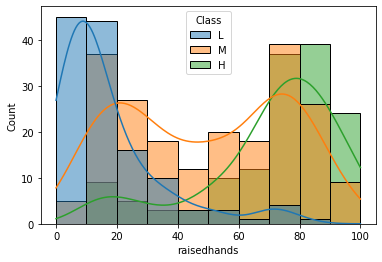

In [ ]:
sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

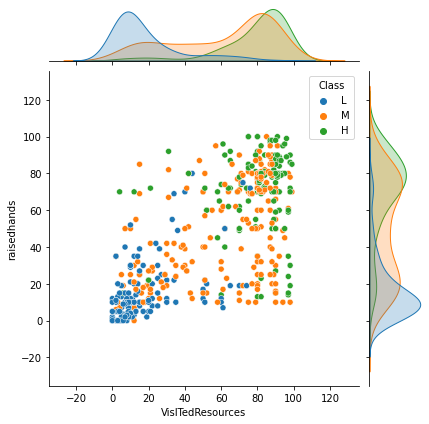

In [ ]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

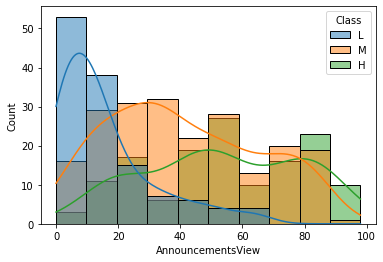

In [ ]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

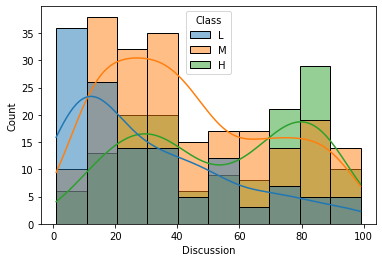

In [ ]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

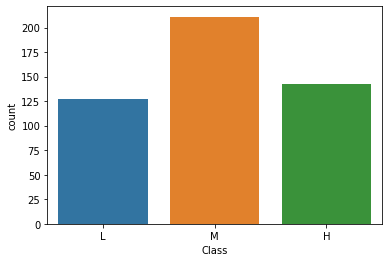

In [ ]:
sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])

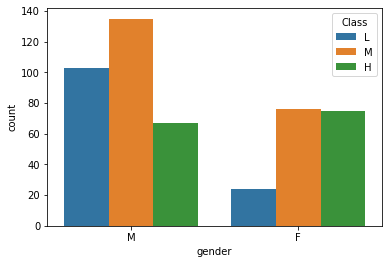

In [ ]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

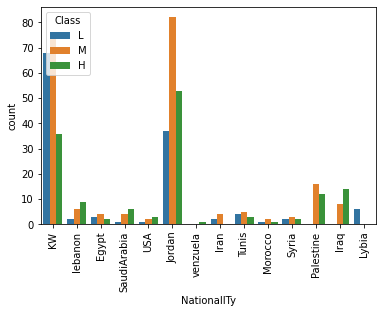

In [ ]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

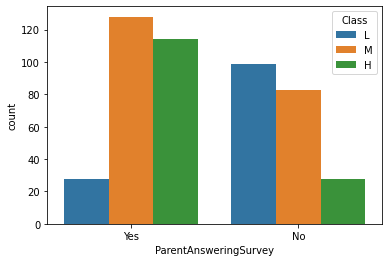

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L', 'M', 'H'])

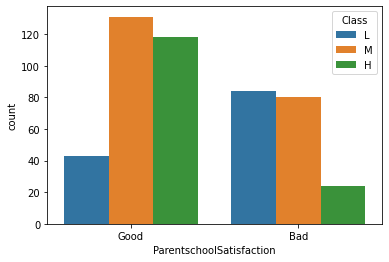

In [ ]:
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class', hue_order=['L', 'M', 'H'])

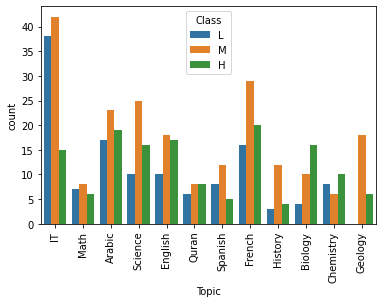

In [ ]:
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

#### 범주형 칼럼 수치화 분석

In [ ]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

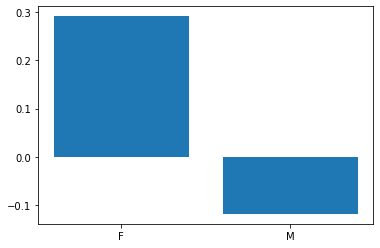

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

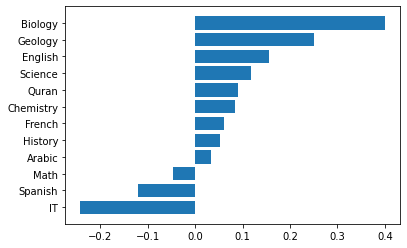

In [ ]:
gb = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(gb.index, gb)

<BarContainer object of 2 artists>

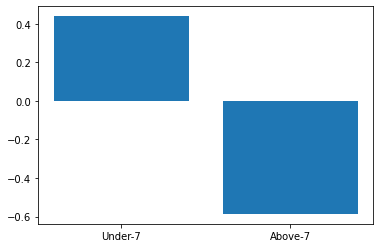

In [ ]:
gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)
plt.bar(gb.index, gb)

### Step 2. 모델 학습을 위한 전처리

#### get_dummies()를 이용하여 범주형 데이터 전처리하기

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)

y = df['Class']


In [ ]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

#### 학습데이터와 테스트데이터 분리

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Step 3. Classification 모델 학습하기(y : 다중분류문제유형)

-  기본 모델은 로지스틱 모델로 설정.
-  데이터가 적기 때문에 KNN, SVM, XGB, LGBM을 모두 하이퍼파라미터 조절을 통해 분석해본다.


#### 기본 모델 분석

In [ ]:
# 결정계수를 설정해서 가장 적합한 로지스틱분석의 결정계수를 정한다.
def LR_model_test(C):
    model = LR(C = C, max_iter = 100000, random_state = 10).fit(X_train, y_train) # 가벼운 모델이므로 max_iter를 크게 잡음
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='micro')
print("C = 0.1:\t{}".format(LR_model_test(C = 0.1)))
print("C = 0.2:\t{}".format(LR_model_test(C = 0.3)))
print("C = 0.3:\t{}".format(LR_model_test(C = 0.4)))
print("C = 0.5:\t{}".format(LR_model_test(C = 0.5)))
print("C = 1:\t{}".format(LR_model_test(C = 1)))
print("C = 3:\t{}".format(LR_model_test(C = 3)))
# cut-off 범위를 0.1로 했을떄, 가장 좋은 로지스틱 모델이 나온다.

C = 0.1:	0.7361111111111113
C = 0.2:	0.7013888888888888
C = 0.3:	0.7013888888888888
C = 0.5:	0.6944444444444444
C = 1:	0.6944444444444444
C = 3:	0.7013888888888888


In [ ]:
model_lr = LR(C = 0.1, max_iter = 100000, random_state = 10)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           H       0.77      0.60      0.67        55
           L       0.88      0.91      0.90        33
           M       0.64      0.77      0.70        56

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.74      0.74      0.73       144



#### 파라미터 그리드 설계

In [ ]:
# 모델 파라미터 그리드 설계
# 키가 모델의 함수, 값이 파라미터 그리드의 값
param_grid = dict() 


param_grid_for_KNN = ParameterGrid({"n_neighbors": [3, 5, 7],
                                    "metric":['euclidean', 'manhattan']})

param_grid_for_SVM = ParameterGrid({"C": [0.1, 1, 10],
                                    "kernel":['rbf', 'linear']})

param_grid_for_XGB = ParameterGrid({"max_depth": [2, 3, 4],
                                    "n_estimators": [50, 100],
                                    "learning_rate": [0.05, 0.1, 0.15, 0.2]})

param_grid_for_LGBM = ParameterGrid({"max_depth": [2, 3, 4],
                                     "n_estimators": [50, 100],
                                     "learning_rate": [0.05, 0.1, 0.15, 0.2]})

param_grid[KNN] = param_grid_for_KNN
param_grid[SVC] = param_grid_for_SVM
param_grid[XGB] = param_grid_for_XGB
param_grid[LGBM] = param_grid_for_LGBM

# 출력을 위한 max_iter_num 계산 
                           
# 튜닝 시작
best_score = 0
iteration_num = 0    
for k in range(30, 5, -1): 
    print(k)
  
    for model_func in [KNN, SVC, XGB,LGBM]:
        for param in param_grid[model_func]:
            model = model_func(**param).fit(X_train.values, y_train.values)
            y_pred = model.predict(X_test.values)
            score = f1_score(y_test, y_pred, average = 'micro')
            if score > best_score:
                best_model_func = model_func
                best_score = score
                best_parameter = param
            iteration_num += 1      


print("모델:", best_model_func)
print("점수:", best_score)
print("파라미터:", best_parameter)      




30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
모델: <class 'xgboost.sklearn.XGBClassifier'>
점수: 0.7569444444444444
파라미터: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}


In [ ]:
final_model_xgb=XGB(max_depth=4, n_estimators=50,learning_rate=0.2)
final_model_xgb.fit(X_train, y_train)
pred_xgb = final_model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

# 기본 모델인 로지스틱 모델에 비해서 f1-score가 0.02 상승했다.

              precision    recall  f1-score   support

           H       0.83      0.73      0.78        55
           L       0.82      0.82      0.82        33
           M       0.67      0.75      0.71        56

    accuracy                           0.76       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.76      0.76       144



#### 특징중요도 파악

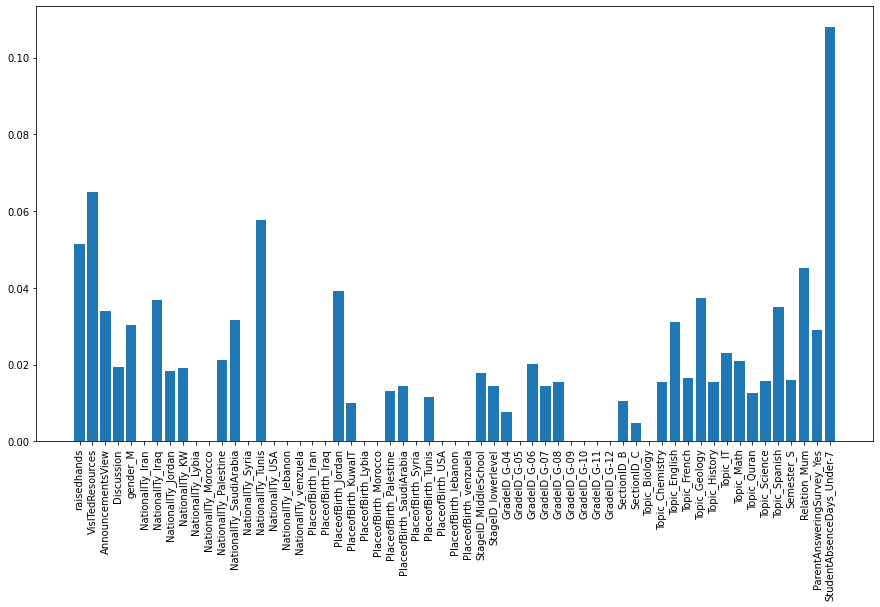

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, final_model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 아이들 학습 능력에 가장 영향을 주는 변수는 StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)이다.

### Step 4. 딥러닝.신경망 모델로 분석

In [ ]:
from keras.optimizers import Adam

In [ ]:
y = pd.get_dummies(df['Class'])

In [ ]:
y.value_counts()

H  L  M
0  0  1    211
1  0  0    142
0  1  0    127
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)

(336, 59) (336, 3)


#### 비교적 단순 모델

In [ ]:
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(59,)))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.BatchNormalization())
  
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                3840      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32)                128       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_11 (Batc (None, 16)                64        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [ ]:
# 콜백 함수 적용 부분(분류모델은 val_loss로)
early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# 분류모델이면 model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/{epoch}-{loss:.2f}.h5', 
                                   monitor='val_loss', save_best_only=True, verbose=1)


history = model.fit(X_train, y_train, batch_size=32,  epochs=1000,
            callbacks=[early_stopping_callback, model_checkpoint],
            validation_data=(X_test, y_test))

Epoch 1/1000
11/11 [==============================] - 3s 30ms/step - loss: 1.2548 - acc: 0.4706 - val_loss: 3.6400 - val_acc: 0.4375

Epoch 00001: val_loss improved from inf to 3.63997, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/1-1.29.h5
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.9935 - acc: 0.5688 - val_loss: 1.9606 - val_acc: 0.4583

Epoch 00002: val_loss improved from 3.63997 to 1.96056, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/2-1.04.h5
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.9648 - acc: 0.5236 - val_loss: 1.3450 - val_acc: 0.4792

Epoch 00003: val_loss improved from 1.96056 to 1.34497, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/3-0.92.h5
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.8177 - acc: 0.6201 - val_loss: 1.1549 - val_acc: 0.4931

Epoch 000

#### 단순딥러닝 모델평가

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.7600 - acc: 0.6944


[0.7600347995758057, 0.6944444179534912]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

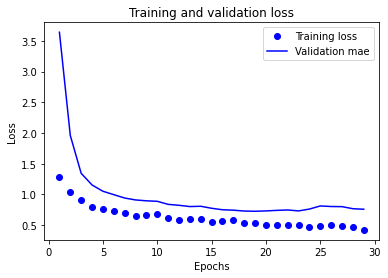

In [ ]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

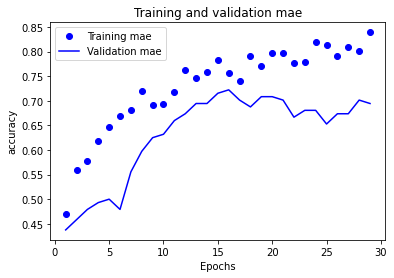

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

#### 복잡한 모델

In [ ]:
    model2 = models.Sequential()
    model2.add(layers.Dense(128, activation='relu',input_shape=(59,)))
    model2.add(layers.BatchNormalization())

    model2.add(layers.Dense(64, activation='relu'))
    model2.add(layers.BatchNormalization())

    model2.add(layers.Dense(64, activation='relu'))
    model2.add(layers.BatchNormalization())

    model2.add(layers.Dense(32, activation='relu'))
    model2.add(layers.BatchNormalization())

    model2.add(layers.Dense(16, activation='relu'))
    model2.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
  
    model2.add(layers.Dense(3, activation='softmax'))
    model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                3840      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32)                128       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_11 (Batc (None, 16)                64        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [ ]:
# 콜백 함수 적용 부분(분류모델은 val_loss로)
early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# 분류모델이면 model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/{epoch}-{loss:.2f}.h5', 
                                   monitor='val_loss', save_best_only=True, verbose=1)


history2 = model2.fit(X_train, y_train, batch_size=64,  epochs=1000,
            callbacks=[early_stopping_callback, model_checkpoint],
            validation_data=(X_test, y_test))

Epoch 1/1000
6/6 [==============================] - 1s 61ms/step - loss: 1.2679 - acc: 0.4061 - val_loss: 1.0141 - val_acc: 0.4097

Epoch 00001: val_loss improved from inf to 1.01405, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/1-1.18.h5
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.8740 - acc: 0.5355 - val_loss: 1.0096 - val_acc: 0.3819

Epoch 00002: val_loss improved from 1.01405 to 1.00956, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/2-0.86.h5
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.7990 - acc: 0.6581 - val_loss: 0.9880 - val_acc: 0.4375

Epoch 00003: val_loss improved from 1.00956 to 0.98799, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제2_딥러닝파라미터/3-0.79.h5
Epoch 4/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.7179 - acc: 0.7151 - val_loss: 0.9940 - val_acc: 0.4861

Epoch 00004: v

#### 복잡딥러닝 모델평가

In [ ]:
model2.evaluate(X_test, y_test)
# 과적합으로 테스트데이터로 실험시 결과가 좋지 않음.

5/5 [==============================] - 0s 3ms/step - loss: 1.0230 - acc: 0.5764


[1.0230451822280884, 0.5763888955116272]

In [ ]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

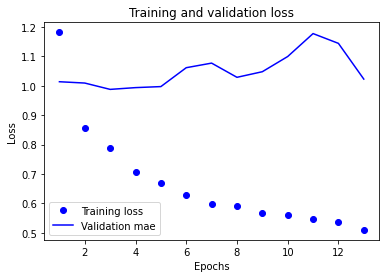

In [ ]:
acc = history2.history['acc'] 
val_acc = history2.history['val_acc'] 
loss = history2.history['loss'] 
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

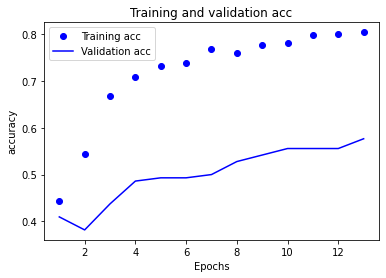

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history2.history['acc'] 
val_acc = history2.history['val_acc'] 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()